# 1. Introduction

This project aims to apply the full exploratory data analysis (EDA) workflow covered in Data Analysis and Modern Tools (INSY 6500). The goal of this project is to work with a real-world dataset using NumPy, Pandas, visualization tools, and best practices from lectures. 

The dataset used is sourced from the **World Air Quality Index (WAQI)** and is publicly available on Kaggle: [Global Air Quality Dataset – Kaggle](https://www.kaggle.com/datasets/waqi786/global-air-quality-dataset).   
It includes 10,000 observations collected across multiple international cities, combining pollutant concentrations (such as PM2.5, PM10, NO₂, SO₂, CO, and O₃) with environmental climate variables (such as temperature, humidity, and pressure at the time of observation). The dataset has a heterogeneous structure of  numerical readings, dates, categorical values, and geographic identifiers, making it well-suited for data exploration.

This notebook demonstrates critical ideas in the course, including:

- Named column access and explicit indexing
- Handling missing, noisy and inconsistent data
- Method chaining for clearer data pipelines
- Descriptive statistics and summarization 
- Visualization
- Feature engineering for improved interpretability
- Narrative interpretation and analysis
- Organization and reproducibility

## 1.1 Project objectives

We aim to understand the following by the end of the project. 

- Analyze global air quality patterns across countries and cities 
- Investigate and understand relationships among pollutant types
- Explore environmental factors and how they interact with air pollution
- Engineer-derived features that support new insights
- Communicate findings using a clear structure and explanation
- Prepare artifacts for a Streamlit dashboard (graduate requirement)

# 2. Research question 

We defined the following research questions:

### 2.1 **City / country differences**
- Which cities and countries have the highest / lowest average PM2.5 and PM10?
- How often do cities exceed “unhealthy” PM2.5 levels?

### 2.2 **Pollution vs. weather**
- How do temperature, humidity, and wind speed relate to pollution levels (PM2.5, PM10, NO2, O3, etc.)?
- Does higher wind speed tend to reduce particulate matter?

### 2.3 **Temporal patterns**
- How does air quality vary across months and seasons in 2023?
- Are some months consistently “worse” across most pollutants?

### 2.4 **Multivariate view**
- Which variables are most strongly associated with overall air quality?  
- Can we identify groups of cities with similar pollution–weather profiles?


**Workflow**  

We will follow the **systematic EDA workflow** from Lecture 12b:

1. Load & Initial Reconnaissance  
2. Data Quality Assessment  
3. Cleaning Decisions  
4. Statistical EDA (univariate → bivariate → multivariate)  
5. Transformations (feature engineering)  
6. Save & Document results  

Throughout, we will iterate between these steps as new questions/insights arise.  

wjsndmdmd


# 3. Load and Initial Reconnaissance 
In this step, we import all the required Python packages and load the air quality dataset. These packages will be used to perform analysis, visualization, statistics and feature engineering throughout the project. 


In [1]:
# 1. Load & Initial Reconnaissance

# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imprt seaborn
import seaborn as sns
sns.set_theme()

# Data path
csv_path = "../data/global_air_quality_data_10000.csv"

# Load data
air_quality = pd.read_csv(csv_path)

print("Dataset loaded successfully.")
print(f"Shape: {air_quality.shape[0]:,} rows × {air_quality.shape[1]} columns\n")     # shape

print("First 5 rows:")
display(air_quality.head())                                                           # First values

print("\nColumn info:")
print(air_quality.info())                                                             # information about data

print("\nBasic summary statistics (numeric columns):")
display(air_quality.describe().T)                                                     # simple statstics 

Dataset loaded successfully.
Shape: 10,000 rows × 12 columns

First 5 rows:


City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB
None

Basic summary statistics (numeric columns):


count        mean        std    min      25%      50%  \
PM2.5        10000.0   77.448439  41.927871   5.02  41.1850   77.725   
PM10         10000.0  104.438161  55.062396  10.00  57.1375  103.690   
NO2          10000.0   52.198649  27.320490   5.01  28.3475   52.100   
SO2          10000.0   25.344490  14.091194   1.00  13.1900   25.350   
CO           10000.0    5.047984   2.852625   0.10   2.5600    5.090   
O3           10000.0  106.031643  55.081345  10.04  58.3800  106.055   
Temperature  10000.0   14.897150  14.443800 -10.00   2.2575   14.755   
Humidity     10000.0   55.078579  25.982232  10.01  32.5275   55.080   
Wind Speed   10000.0   10.231636   5.632628   0.50   5.2900   10.260   

                  75%     max  
PM2.5        113.3925  149.98  
PM10         152.2650  200.00  
NO2           75.7050  100.00  
SO2           37.5000   49.99  
CO             7.4800   10.00  
O3           153.9825  200.00  
Temperature   27.3825   40.00  
Humidity      77.4425   99.99  
Wind Speed    15.0700   20.00

## 3.1 Data Types, Parsing, and Initial Structure

In [2]:
# Convert date to datetime
air_quality['Date'] = pd.to_datetime(air_quality['Date'], errors='coerce')

# Convert city and country to categorical types
air_quality['City'] = air_quality['City'].astype('category')
air_quality['Country'] = air_quality['Country'].astype('category')

# Identify numeric columns
numeric_cols = ['PM2.5','PM10','NO2','SO2','CO','O3','Temperature','Humidity','Wind Speed']

# Ensure numeric columns are numeric
air_quality[numeric_cols] = air_quality[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Verify 
air_quality.info()

# memory usage 
memory_usage = air_quality.memory_usage(deep=True).sum()
print(f"\nTotal memory usage (deep=True): {memory_usage / (1024 * 1024):.2f} MB")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         10000 non-null  category      
 1   Country      10000 non-null  category      
 2   Date         10000 non-null  datetime64[ns]
 3   PM2.5        10000 non-null  float64       
 4   PM10         10000 non-null  float64       
 5   NO2          10000 non-null  float64       
 6   SO2          10000 non-null  float64       
 7   CO           10000 non-null  float64       
 8   O3           10000 non-null  float64       
 9   Temperature  10000 non-null  float64       
 10  Humidity     10000 non-null  float64       
 11  Wind Speed   10000 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(9)
memory usage: 802.3 KB

Total memory usage (deep=True): 0.79 MB


# 4. Data Quality Assessment  
In this section, we evaluate the dataset for missing values, duplicates, out-of-range values, and outliers to learn about possible issues when doing the statistical analysis 

## 4.1 Missing values 

In [3]:
# Check missing values
missing = air_quality.isna().sum()       # isna().sum() to find number of null values

print("Missing values per column:\n")    # print null values count 
print(missing)

Missing values per column:

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64


Interpretation  
the data we have is perfect (but this not always true for real datasets)
- Based on the info results earlier, we expect zero missing values, but we need to confirm.
- If any column has missing values, we will decide whether to drop, fill, or investigate further.

## 4.2 Duplicated Rows

In [4]:
# Check duplicates
duplicates = air_quality.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Interpretation
  
The data is clean, no duplicate rows are present.

## 4.3 Out-of-range and impossible values

In [5]:
# defind function to show rows where condition is True
def show_violations(condition, cols=None, max_rows=5):      # define to show 5 rows to see pattern
    bad = air_quality[condition]
    print(f"Violations: {len(bad)} rows")
    if len(bad) > 0:
        display(bad[cols].head(max_rows))

# 1. Pollutants should not be negative
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
cond_neg_pollutants = (air_quality[pollutant_cols] < 0).any(axis=1)
print("Negative pollutant values:")
show_violations(cond_neg_pollutants, pollutant_cols)

# 2. Humidity should be between 0 and 100
cond_bad_humidity = (air_quality['Humidity'] < 0) | (air_quality['Humidity'] > 100)
print("\nHumidity outside [0, 100]:")
show_violations(cond_bad_humidity, ['City', 'Country', 'Date', 'Humidity'])

# 3. Wind speed should not be negative
cond_bad_wind = air_quality['Wind Speed'] < 0
print("\nNegative wind speed:")
show_violations(cond_bad_wind, ['City', 'Country', 'Date', 'Wind Speed'])

# 4. Temperature, check extreme values
print("\nTemperature summary:")
display(air_quality['Temperature'].describe())

Negative pollutant values:
Violations: 0 rows

Humidity outside [0, 100]:
Violations: 0 rows

Negative wind speed:
Violations: 0 rows

Temperature summary:


count    10000.00000
mean        14.89715
std         14.44380
min        -10.00000
25%          2.25750
50%         14.75500
75%         27.38250
max         40.00000
Name: Temperature, dtype: float64


# 4.5 Cleaning Decisions (Interpretation)

Data quality reports show the dataset has no structural problems. All pollutants PM2.5, PM10, NO2, SO2, CO, O3 are non-negative. Values are real. A reasonable range of air pollution exists. Humidity ranges from zero toward 100% because values cannot be lower than 0 or exceed 100: values that are impossible (negative humidity) cannot occur. No abnormal negative wind speeds confirm appropriate measurement and recording. The temperature is reported within reasonable limits between -10 and +40 °C, which is consistent with global climate variability. Each check results in 0 violations, indicating we have no out of bounds or impossible values. This gives us confidence the measurements have a good quality, and that we can perform deeper statistical investigations without the need for much cleaning.

# 5. Statistical EDA 
This section looks into univariate and their relationships. . The goal is to find patterns, distributions, anomalies and perceptions. The result might help support or inform the answers to the research questions.

In this section, we will explore the following:

1. Univariate Analysis 
- Histograms
- Boxplots
***
2. Bivariate Analysis 
- Heatmaps and Correlation Matrix 
- Scatter Plots
***
3. Groups Comparasions
- Top 10 polluted countries
- Top 10 cleanest countries 
***
4. Multivariate Analysis 
- Multiple Regression
***
5. Advanced 
- Clustering 
- PCA
- Time Series 
    - Montly Trends 
    - Seasonal Patterns 
***

## 5.1 EDA Univariate Analysis

### 5.1.1 Categorical Variables Summary
In this section, we summarize the number of countries and cities represented in the dataset. This helps us understand the coverage of the study and how often each location appears in the recorded measurements.

In [6]:
num_countries = air_quality['Country'].nunique()
print(f"Number of countries in the dataset: {num_countries}")

num_cities = air_quality['City'].nunique()
print(f"Number of cities in the dataset: {num_cities}")


Number of countries in the dataset: 19
Number of cities in the dataset: 20


In [7]:
# Value counts
country_counts = air_quality["Country"].value_counts()
city_counts = air_quality["City"].value_counts()

# Display the tables
print("Country Frequency Table:\n")
print(country_counts)

Country Frequency Table:

Country
USA             962
India           540
South Korea     522
South Africa    521
UAE             520
Germany         519
Canada          518
Spain           518
Egypt           510
Thailand        499
Turkey          492
Japan           491
Brazil          491
France          489
UK              489
China           488
Australia       486
Russia          482
Mexico          463
Name: count, dtype: int64


In [8]:
print("City Frequency Table:\n")
print(city_counts)

City Frequency Table:

City
Mumbai            540
Seoul             522
Johannesburg      521
Dubai             520
Berlin            519
Toronto           518
Madrid            518
Cairo             510
Bangkok           499
Los Angeles       497
Istanbul          492
Rio de Janeiro    491
Tokyo             491
London            489
Paris             489
Beijing           488
Sydney            486
Moscow            482
New York          465
Mexico City       463
Name: count, dtype: int64


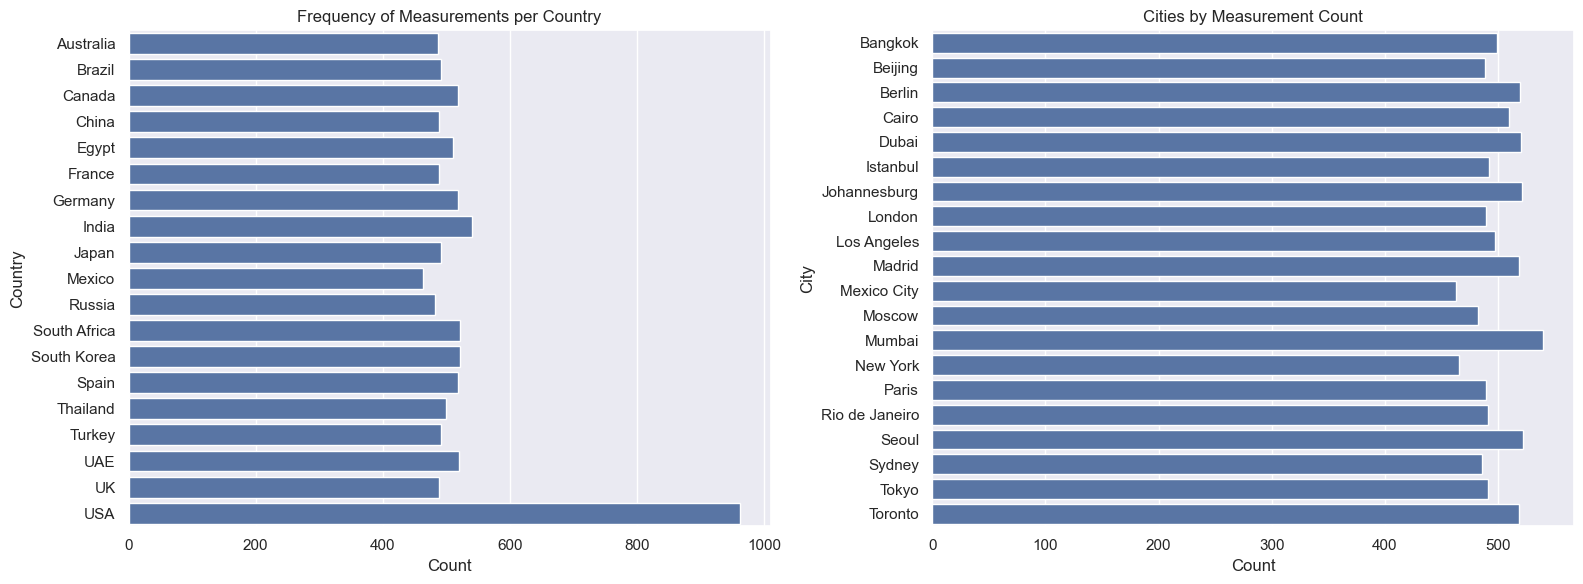

In [9]:
# Barplots for categorical variables
plt.figure(figsize=(16, 6))

# Country barplot
plt.subplot(1, 2, 1)
sns.barplot(x=country_counts, y=country_counts.index, orient='h')
plt.title("Frequency of Measurements per Country")
plt.xlabel("Count")
plt.ylabel("Country")

# City barplot (top 20 to avoid extremely long chart)
plt.subplot(1, 2, 2)
sns.barplot(x=city_counts, y=city_counts.index, orient='h')
plt.title("Cities by Measurement Count")
plt.xlabel("Count")
plt.ylabel("City")

plt.tight_layout()
plt.show()

### 5.1.2 Histogram and boxplot
In this section, we use histograms and boxplots to get a clearer view of how each variable is distributed. These plots help us notice any patterns in the data, identify possible outliers, and understand the overall shape of the distribution. Since this is a univariate analysis, each variable is examined on its own. 

We applied these visualizations to the numerical variables: **PM2.5, PM10, NO2, SO2, CO, O3, Temperature, Humidity, and Wind Speed**.

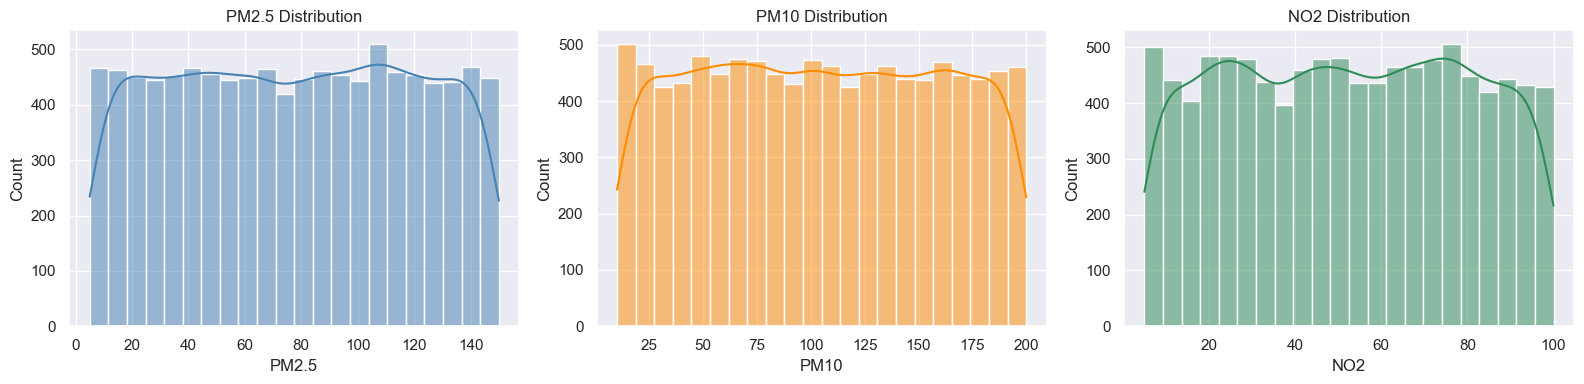

In [10]:
# Pollutants – Histograms: PM2.5, PM10, NO2

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(data=air_quality, x="PM2.5", kde=True, ax=axes[0], color='steelblue')
axes[0].set_title("PM2.5 Distribution")

sns.histplot(data=air_quality, x="PM10", kde=True, ax=axes[1], color='darkorange')
axes[1].set_title("PM10 Distribution")

sns.histplot(data=air_quality, x="NO2", kde=True, ax=axes[2], color='seagreen')
axes[2].set_title("NO2 Distribution")

plt.tight_layout()
plt.show()

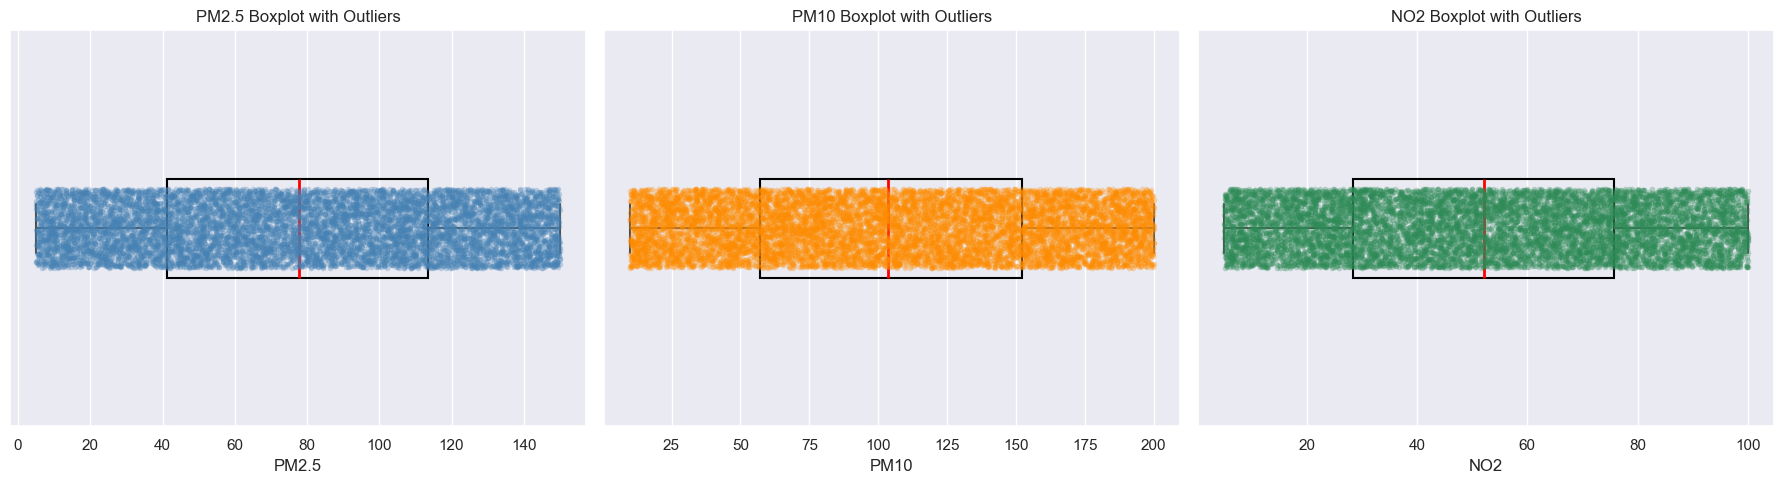

In [11]:
# Pollutants – Boxplots: PM2.5, PM10, NO2

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PM2.5 
sns.stripplot(
    data=air_quality, x="PM2.5", ax=axes[0],
    color='steelblue', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="PM2.5", ax=axes[0],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[0].set_title("PM2.5 Boxplot with Outliers")

#  PM10 
sns.stripplot(
    data=air_quality, x="PM10", ax=axes[1],
    color='darkorange', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="PM10", ax=axes[1],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[1].set_title("PM10 Boxplot with Outliers")

# NO2
sns.stripplot(
    data=air_quality, x="NO2", ax=axes[2],
    color='seagreen', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="NO2", ax=axes[2],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[2].set_title("NO2 Boxplot with Outliers")

plt.tight_layout()
plt.show()

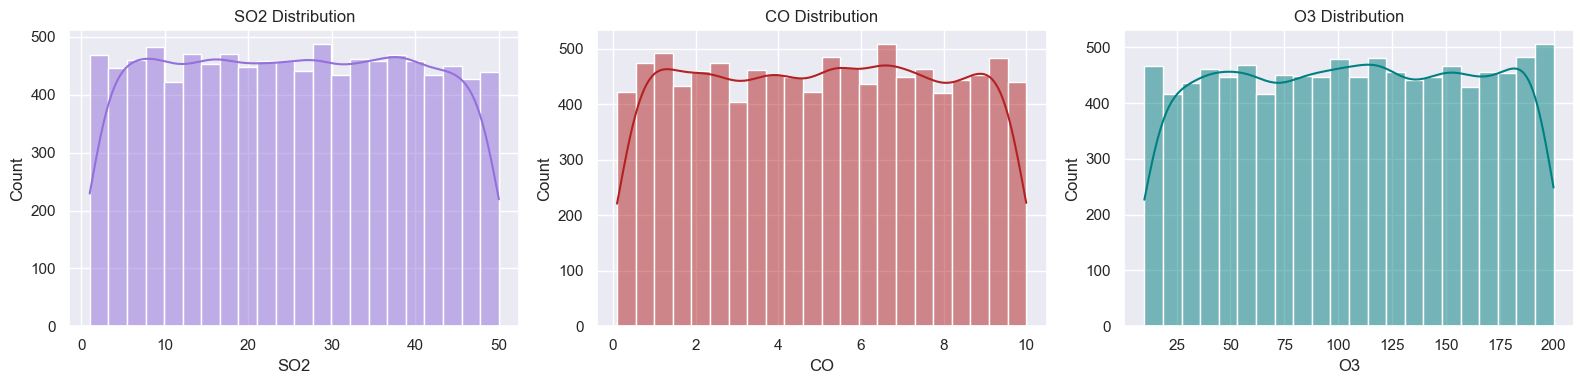

In [12]:
# Pollutants – Histograms: SO2, CO, O3

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(data=air_quality, x="SO2", kde=True, ax=axes[0], color='mediumpurple')
axes[0].set_title("SO2 Distribution")

sns.histplot(data=air_quality, x="CO", kde=True, ax=axes[1], color='firebrick')
axes[1].set_title("CO Distribution")

sns.histplot(data=air_quality, x="O3", kde=True, ax=axes[2], color='teal')
axes[2].set_title("O3 Distribution")

plt.tight_layout()
plt.show()

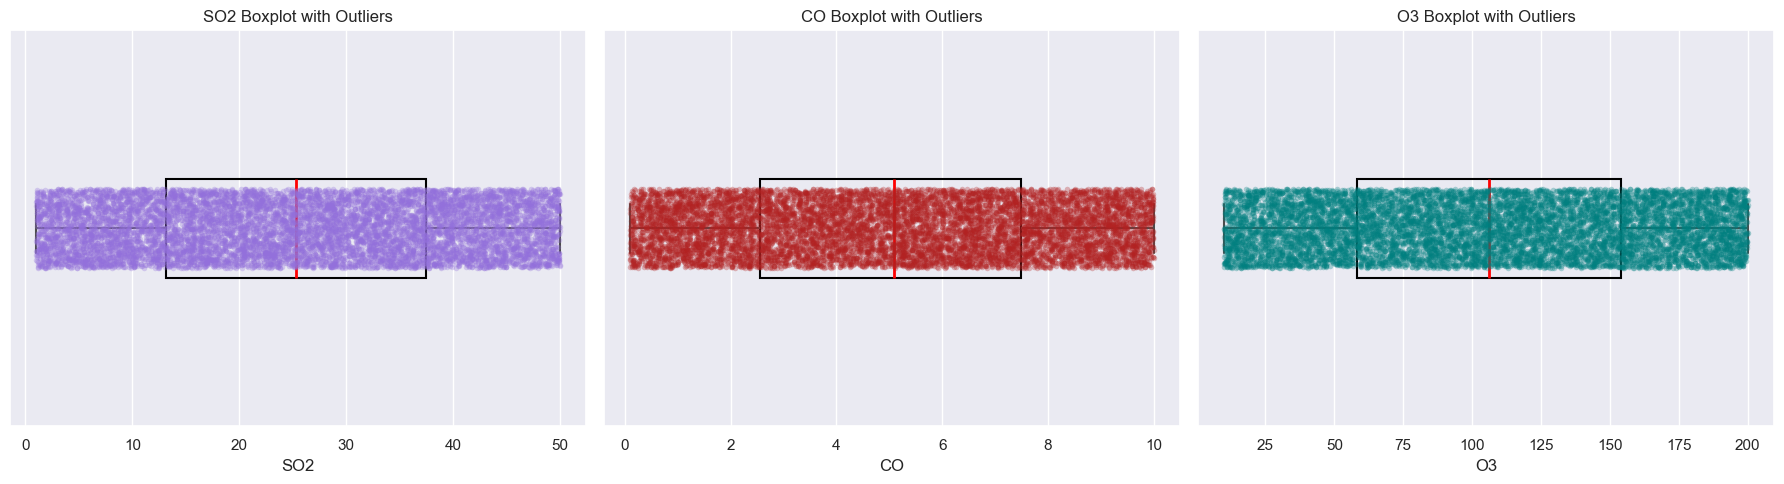

In [13]:
# Boxplots – SO2, CO, O3 (NO LOOP)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SO2 
sns.stripplot(
    data=air_quality, x="SO2", ax=axes[0],
    color='mediumpurple', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="SO2", ax=axes[0],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[0].set_title("SO2 Boxplot with Outliers")

# CO 
sns.stripplot(
    data=air_quality, x="CO", ax=axes[1],
    color='firebrick', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="CO", ax=axes[1],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[1].set_title("CO Boxplot with Outliers")

# O3 
sns.stripplot(
    data=air_quality, x="O3", ax=axes[2],
    color='teal', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="O3", ax=axes[2],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[2].set_title("O3 Boxplot with Outliers")

plt.tight_layout()
plt.show()

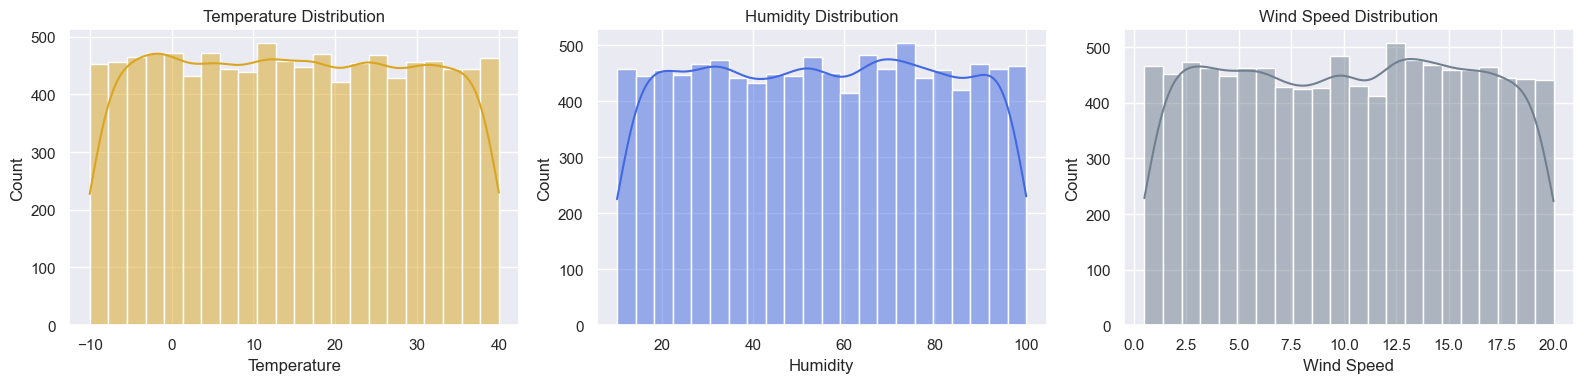

In [14]:
# Weather – Histograms: Temperature, Humidity, Wind Speed

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(data=air_quality, x="Temperature", kde=True, ax=axes[0], color='goldenrod')
axes[0].set_title("Temperature Distribution")

sns.histplot(data=air_quality, x="Humidity", kde=True, ax=axes[1], color='royalblue')
axes[1].set_title("Humidity Distribution")

sns.histplot(data=air_quality, x="Wind Speed", kde=True, ax=axes[2], color='slategray')
axes[2].set_title("Wind Speed Distribution")

plt.tight_layout()
plt.show()

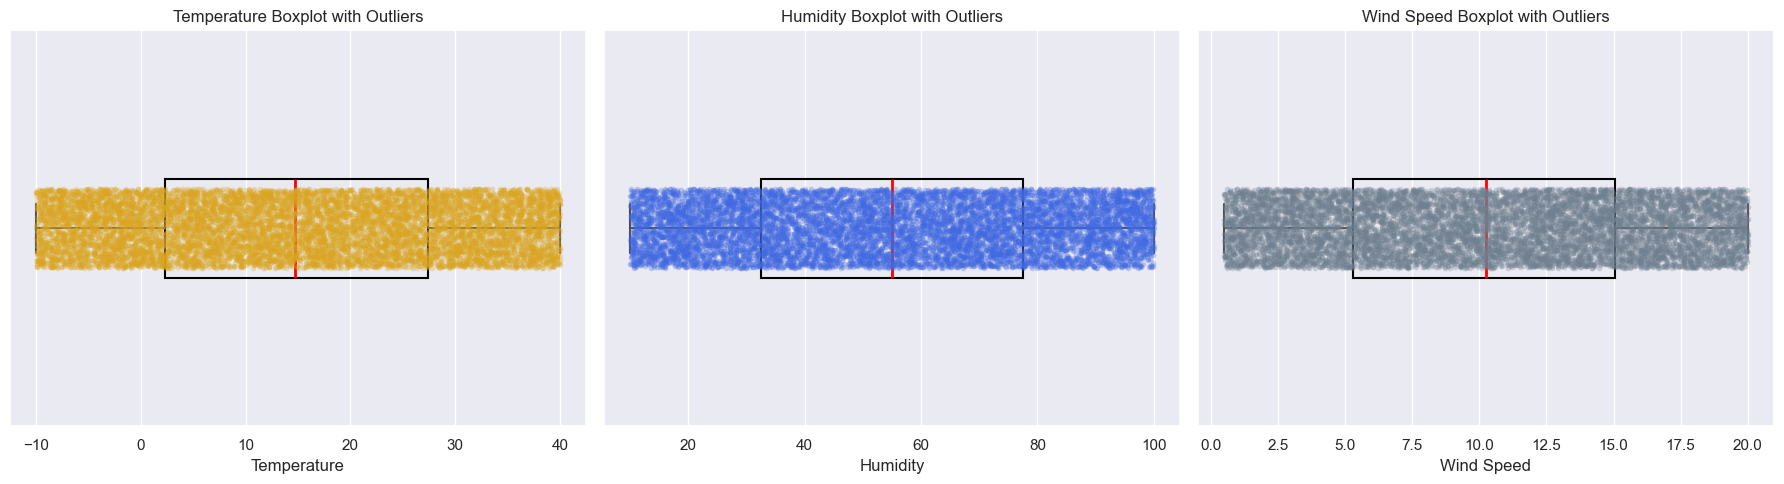

In [15]:
# Weather – Boxplots: Temperature, Humidity, Wind Speed

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature 
sns.stripplot(
    data=air_quality, x="Temperature", ax=axes[0],
    color='goldenrod', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="Temperature", ax=axes[0],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[0].set_title("Temperature Boxplot with Outliers")

#  Humidity 
sns.stripplot(
    data=air_quality, x="Humidity", ax=axes[1],
    color='royalblue', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="Humidity", ax=axes[1],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[1].set_title("Humidity Boxplot with Outliers")

# Wind Speed 
sns.stripplot(
    data=air_quality, x="Wind Speed", ax=axes[2],
    color='slategray', alpha=0.3, size=4, jitter=True
)

sns.boxplot(
    data=air_quality, x="Wind Speed", ax=axes[2],
    width=0.25, showcaps=True,
    boxprops=dict(facecolor='none', edgecolor='black', linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2)
)
axes[2].set_title("Wind Speed Boxplot with Outliers")

plt.tight_layout()
plt.show()

### 5.1.3 Univariate Summary
The dataset contains measurements of 10,000 observations of major air pollutants and weather conditions across several cities around the world. The distributions of the variables appear to be fairly uniform inside the dataset, indicating a wide variety of environments within the dataset. The concentrations (PM2.5, PM10, NO2, SO2, CO, O3) and the values reported for weather (Temperature, Humidity, and Wind Speed) exist within realistic ranges. There are no extreme outliers. This indicates that the dataset is clean, balanced, and suitable for researching statistical correlations and patterns within it.

***
Data statstics summary: 
#### Table 1. Summary Statistics for Air Quality and Weather Variables

| Variable       | Min    | Max    | Mean      | Median   | Std Dev   |
|----------------|--------|--------|-----------|----------|-----------|
| **PM2.5**      | 5.02   | 149.98 | 77.45     | 77.73    | 41.93     |
| **PM10**       | 10.00  | 200.00 | 104.44    | 103.69   | 55.06     |
| **NO2**        | 5.01   | 100.00 | 52.20     | 52.10    | 27.32     |
| **SO2**        | 1.00   | 49.99  | 25.35     | 25.35    | 14.09     |
| **CO**         | 0.10   | 10.00  | 5.05      | 5.09     | 2.85      |
| **O3**         | 10.04  | 200.00 | 106.03    | 106.05   | 55.08     |
| **Temperature**| -10.00 | 40.00  | 14.90     | 14.76    | 14.44     |
| **Humidity**   | 10.01  | 99.99  | 55.08     | 55.08    | 25.98     |
| **Wind Speed** | 0.50   | 20.00  | 10.23     | 10.26    | 5.63      |


####  [Table 2. EPA AQI Breakpoints](https://document.airnow.gov/technical-assistance-document-for-the-reporting-of-daily-air-quailty.pdf)

| AQI Category | AQI Range | O₃ (ppm, 8-hr) | O₃ (ppm, 1-hr) | PM2.5 (µg/m³, 24-hr) | PM10 (µg/m³, 24-hr) | CO (ppm, 8-hr) | SO₂ (ppb, 1-hr) | NO₂ (ppb, 1-hr) |
|--------------|-----------|----------------|------------------|-----------------------|----------------------|------------------|-------------------|-------------------|
| **Good** | 0–50 | 0.000–0.054 | – | 0.0–9.0 | 0–54 | 0.0–4.4 | 0–35 | 0–53 |
| **Moderate** | 51–100 | 0.055–0.070 | – | 9.1–35.4 | 55–154 | 4.5–9.4 | 36–75 | 54–100 |
| **Unhealthy for Sensitive Groups** | 101–150 | 0.071–0.085 | 0.125–0.164 | 35.5–55.4 | 155–254 | 9.5–12.4 | 76–185 | 101–360 |
| **Unhealthy** | 151–200 | 0.086–0.105 | 0.165–0.204 | 55.5–125.4 | 255–354 | 12.5–15.4 | 186–304 | 361–649 |
| **Very Unhealthy** | 201–300 | 0.106–0.200 | 0.205–0.404 | 125.5–225.4 | 355–424 | 15.5–30.4 | 305–604 | 650–1249 |
| **Hazardous** | 301–500 | 0.201+ | 0.405+ | 225.5+ | 425+ | 30.5+ | 605+ | 1250+ |


#### Table 1 and Table 2 Conclusions from Summary Statistics vs. EPA AQI Breakpoints

- **PM2.5**: The mean (77.45 µg/m³) and median (77.73) fall in the **Unhealthy** AQI category, indicating significant particulate pollution.

- **PM10**: With a mean of 104.44 µg/m³, most values fall within **Moderate to Unhealthy for Sensitive Groups**.

- **NO2**: The mean (52.20 ppb) is just below the **Good** limit, but maximum values reach the **Moderate** range.

- **SO2**: Mean levels (25.35 ppb) stay within the **Good** range, suggesting no major SO₂ risk.

- **CO**: The mean (5.05 ppm) remains within **Good to Moderate** levels, far from harmful concentrations.

- **O3**: The mean (106.03 µg/m³) corresponds to **Unhealthy to Very Unhealthy**, indicating elevated ozone pollution.

- **Weather Variables (Temperature, Humidity, Wind Speed)** show wide ranges, reflecting diverse climates, which may affect pollution dispersion.

**Overall:** PM2.5 and O3 represent the most concerning pollutants in this dataset, consistently exceeding EPA health-based thresholds.

***
#### Most Important Pollutants (Why They Matter)

Among all pollutants in the dataset, **PM2.5** and **O3 (ozone)** are the most critical for public health based on their concentrations and EPA safety thresholds:

- **PM2.5 (fine particulate matter)**  
  - The mean level (77.45 µg/m³) falls in the **Unhealthy** category.  
  - PM2.5 is extremely dangerous because the particles are small enough to enter the bloodstream, increasing the risk of:
    - heart disease  
    - asthma attacks  
    - reduced lung function  
    - premature mortality  
  - PM2.5 exceeding 55.5 µg/m³ is already harmful, and our dataset average is far above that.

- **O3 (ozone)**  
  - The mean O₃ level (106 µg/m³) corresponds to **Unhealthy to Very Unhealthy**.  
  - High ozone exposure irritates the lungs and can trigger:
    - shortness of breath  
    - coughing and airway inflammation  
    - increased hospital admissions for respiratory diseases  
  - Ozone becomes dangerous especially on hot, sunny days, matching the temperature ranges in the dataset.

Together, **PM2.5 and O3** represent the highest health risk, consistently exceeding EPA standards and posing serious implications for air quality and human health.
***

## 5.2 EDA Bivariate Analysis

### 5.2.1 Correlation Matrix and Heatmap

The purpose of this section is to explain the relation between air pollutants variables interact with each other. A correlation analysis identifies:  

- Which pollutants increase together (positive correlation).
- Which pollutants move in opposite directions (negative correlation).
- Temperature, humidity, and wind speed influence air pollution levels.

This step founds the identification of the strongest relationships. before moving on to scatterplots and regression analysis.

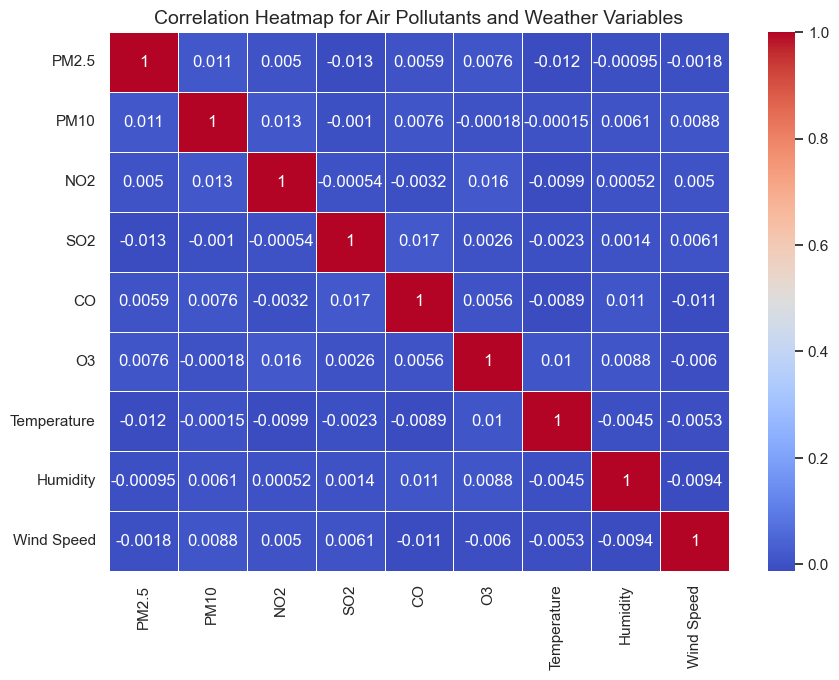

In [16]:
# Corrlation Matrix and Heatmap
corr_matrix = air_quality[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Air Pollutants and Weather Variables", fontsize=14)
plt.show()

#### 5.2.1.1 Equation used
The heatmap was calculated based on the Pearson correlation coefficient. Correlation formula:

r = Cov(X, Y) / (σX · σY)

It measures the strength in addition to the direction of the linear relationship. Two variables. A value of 0 indicates no linear relationship. Values near ±1 indicate strong relationships.

#### 5.2.1.2 Heatmap Matrix interpretation 
The correlation heatmap shows relationships between the air pollutants and weather variables are generally very weak. Most correlation values close to zero, meaning that changes in one variable do not strongly predict changes in another.

- **PM2.5, PM10, NO2, SO2, CO and O3** had a weak correlation with each other  do not move together across, indicating that the pollutants do not move together in a clear linear pattern.

- The weather conditions ( Tempreture, Humadity and Wind) do not seem to have a strong direct linear effect pollution values.

- None of the variable pairs have a moderate or strong correlation. All of these values approximate 0 closely.


### 5.2.2 Scatterplots

#### 5.2.2.1 PM2.5 vs weather variables 
In this section, we explore the behavior of PM2.5 with respect to major weather conditions such as temperature, humidity and wind speed using scatterplots. Whether PM2.5 tends to increase or decrease with changing weather conditions.

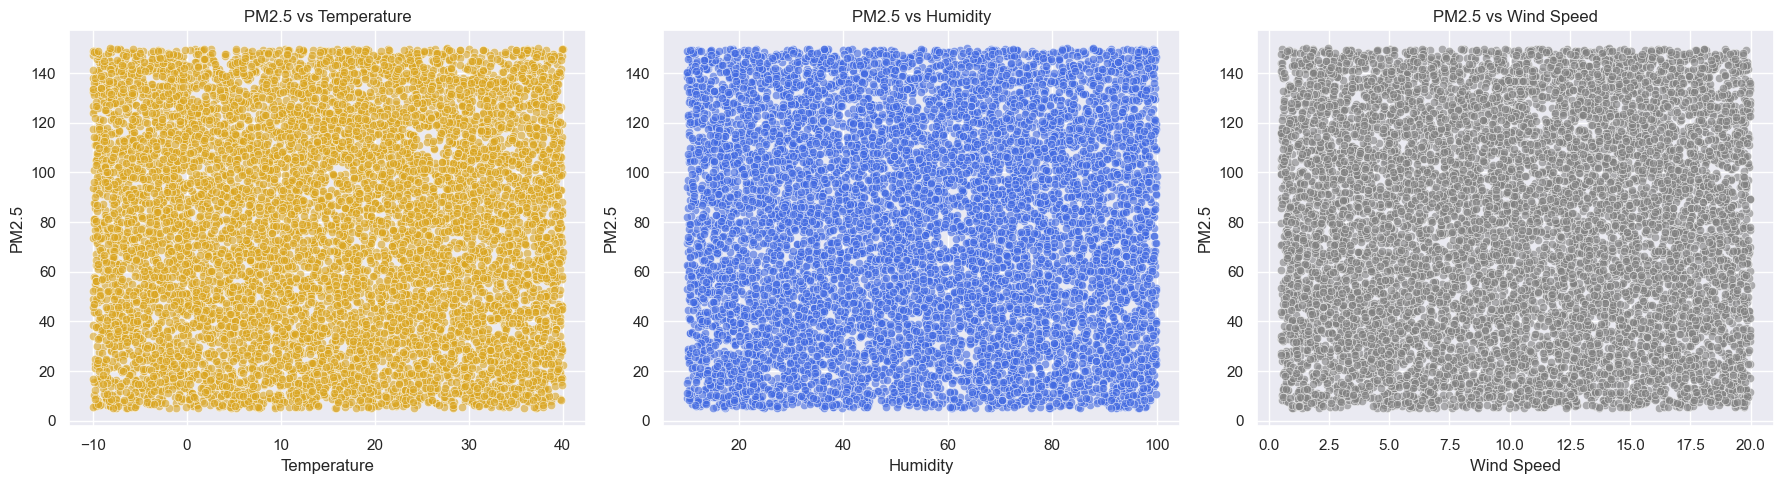

In [17]:
# Group 1 (PM2.5 vs Weather Variables)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PM2.5 vs Temperature
sns.scatterplot(data=air_quality, x="Temperature", y="PM2.5",
                color="goldenrod", ax=axes[0], alpha=0.6)
axes[0].set_title("PM2.5 vs Temperature")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("PM2.5")

# PM2.5 vs Humidity
sns.scatterplot(data=air_quality, x="Humidity", y="PM2.5",
                color="royalblue", ax=axes[1], alpha=0.6)
axes[1].set_title("PM2.5 vs Humidity")
axes[1].set_xlabel("Humidity")
axes[1].set_ylabel("PM2.5")

# PM2.5 vs Wind Speed
sns.scatterplot(data=air_quality, x="Wind Speed", y="PM2.5",
                color="gray", ax=axes[2], alpha=0.6)
axes[2].set_title("PM2.5 vs Wind Speed")
axes[2].set_xlabel("Wind Speed")
axes[2].set_ylabel("PM2.5")

plt.tight_layout()
plt.show()

#### 5.2.2.2 PM2.5 vs Other Pollutants

This section explores how PM2.5 relates to other common pollutants such as PM10, NO2, and CO. Scatter plots help visualize whether higher PM2.5 levels tend to occur alongside increases in other pollutant concentrations.


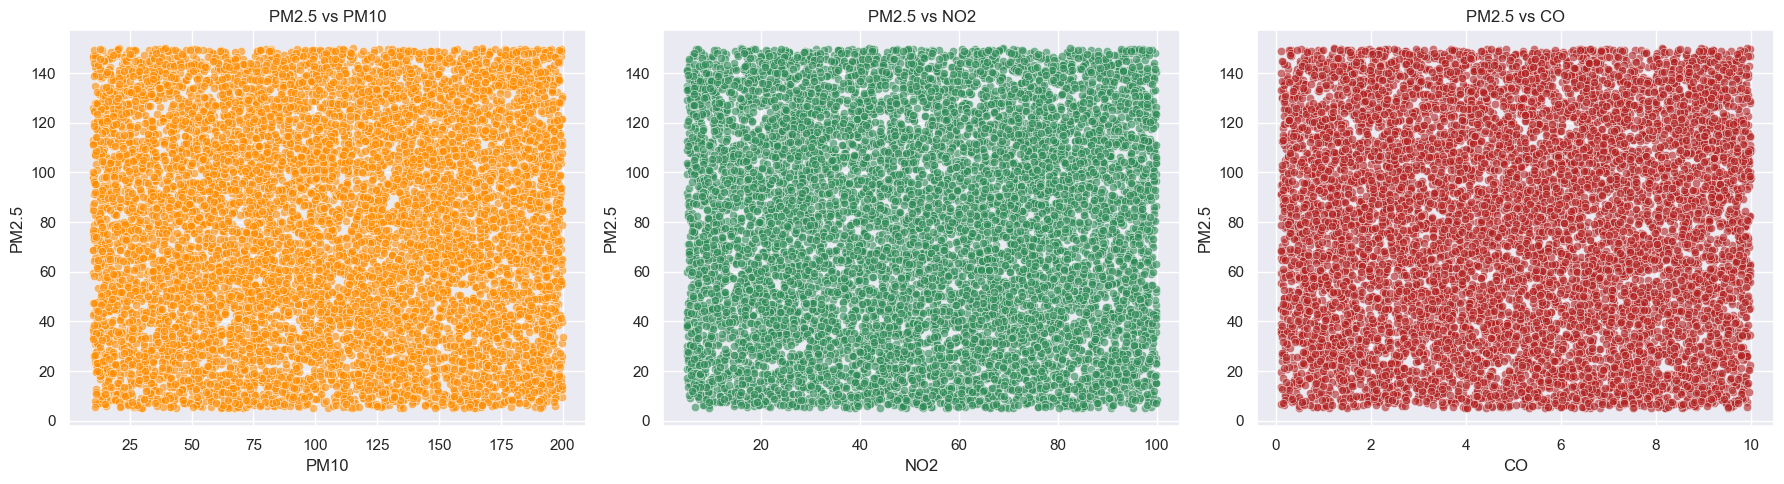

In [18]:
# PM2.5 vs Other Pollutants

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PM2.5 vs PM10
sns.scatterplot(data=air_quality, x="PM10", y="PM2.5",
                color="darkorange", alpha=0.6, ax=axes[0])
axes[0].set_title("PM2.5 vs PM10")
axes[0].set_xlabel("PM10")
axes[0].set_ylabel("PM2.5")

# PM2.5 vs NO2
sns.scatterplot(data=air_quality, x="NO2", y="PM2.5",
                color="seagreen", alpha=0.6, ax=axes[1])
axes[1].set_title("PM2.5 vs NO2")
axes[1].set_xlabel("NO2")
axes[1].set_ylabel("PM2.5")

# PM2.5 vs CO
sns.scatterplot(data=air_quality, x="CO", y="PM2.5",
                color="firebrick", alpha=0.6, ax=axes[2])
axes[2].set_title("PM2.5 vs CO")
axes[2].set_xlabel("CO")
axes[2].set_ylabel("PM2.5")

plt.tight_layout()
plt.show()

#### 5.2.2.3 O₃ vs Weather Variables
This section examines how ozone (O₃) levels relate to key weather factors.

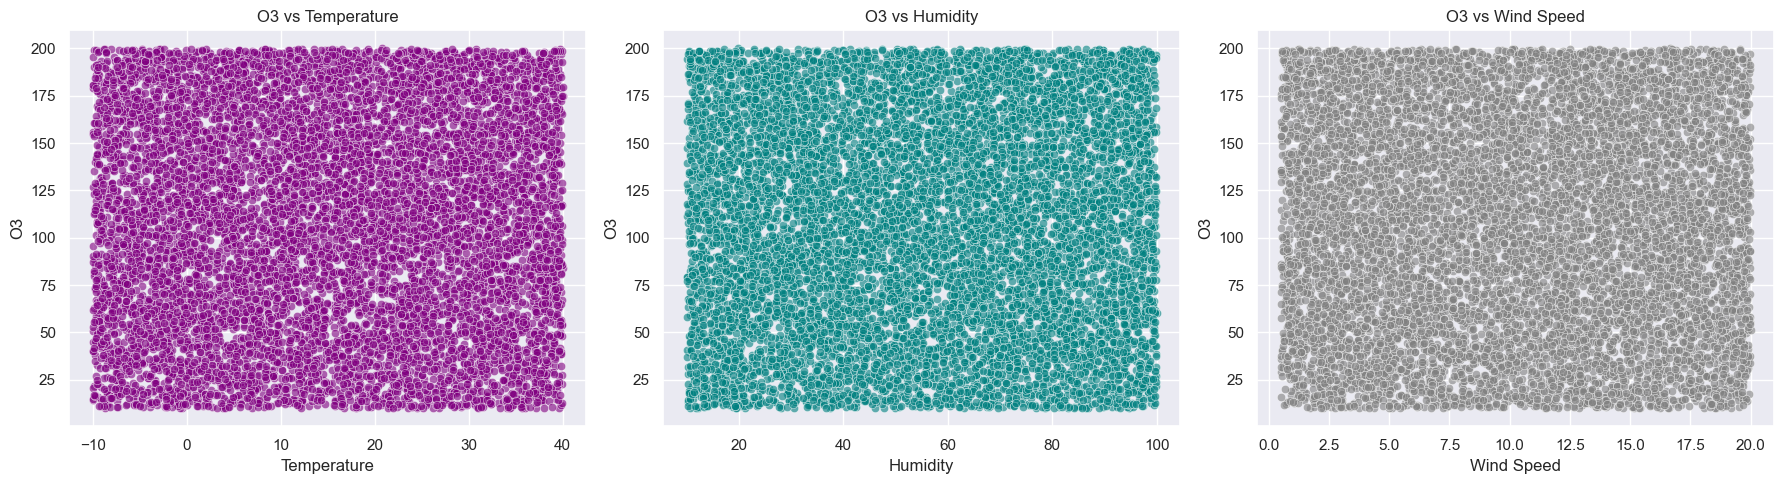

In [19]:
# O3 vs Weather Variables

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# O3 vs Temperature
sns.scatterplot(data=air_quality, x="Temperature", y="O3",
                color="purple", alpha=0.6, ax=axes[0])
axes[0].set_title("O3 vs Temperature")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("O3")

# O3 vs Humidity
sns.scatterplot(data=air_quality, x="Humidity", y="O3",
                color="teal", alpha=0.6, ax=axes[1])
axes[1].set_title("O3 vs Humidity")
axes[1].set_xlabel("Humidity")
axes[1].set_ylabel("O3")

# O3 vs Wind Speed
sns.scatterplot(data=air_quality, x="Wind Speed", y="O3",
                color="gray", alpha=0.6, ax=axes[2])
axes[2].set_title("O3 vs Wind Speed")
axes[2].set_xlabel("Wind Speed")
axes[2].set_ylabel("O3")

plt.tight_layout()
plt.show()

#### 5.2.2.4 Interpretation for All Groups

In the scatter plots, the data points are widely scattered across, and they do not appear to follow any linear relationship, indicating that most of the variables do not correlate at all.

- **PM2.5 vs Weather Variables:**  
The data show no consistent temperature, humidity, or wind speed trends relative to PM2.5 levels. This suggests short-term weather has no influence on fine particulate levels.

- **PM2.5 vs Other Pollutants:**  
In the scatterplots, PM2.5 does not correlate with PM10, NO2, and CO concentrations in an obvious way at all. Although there may well be complex interactions between the pollutants in wider environmental terms, this may not be clear in the graphs.

- **O₃ vs Weather Variables:**  
Ozone concentrations do not correlate linearly with temperature, humidity, or wind speed, as the plot of data points is distributed relatively evenly across the relevant data range.

The scatter plots show that there is no meaningful linear
relationships between pollutants or between pollutants and weather variables. There are weak correlations between some variables, but they are not visually obvious.



## 5.3 Group Comparisons

### 5.3.1 Average Pollution Levels by Country

In this section, we compare the average concentration of major air pollutants  across different countries. This aggregated analysis helps identify which  regions tend to experience higher pollution levels and which regions maintain  cleaner air quality.

In [20]:
# Average of all pollutants per country
avg_pollutants = (
    air_quality.groupby("Country", observed=False)[pollutant_cols]
    .mean()
    .sort_values(by="PM2.5", ascending=False)   # Sort countries by PM2.5
)

avg_pollutants

PM2.5        PM10        NO2        SO2        CO  \
Country                                                               
UAE           80.013692  103.891192  52.683038  24.964096  5.084346   
Australia     78.933560  103.373951  52.474938  25.684033  5.023477   
India         78.901167  105.841667  53.344074  25.029444  5.077556   
Japan         78.867475  105.040937  52.672770  27.978635  5.101446   
Mexico        78.855054  104.526868  50.863650  26.022138  5.141339   
China         78.627848  103.189877  51.621045  24.903258  5.093443   
Russia        77.878610  105.936286  52.029876  26.110913  5.120996   
Canada        77.827645  103.867799  51.546834  24.802027  4.946544   
Turkey        77.711220  103.140102  52.022439  25.769207  5.123171   
South Africa  77.666008  105.135125  53.146929  24.674261  5.093397   
UK            77.614908  103.843804  52.334581  25.495501  4.954110   
Thailand      77.461483  103.933988  51.507154  25.575792  5.263928   
USA           77.113680  104.288035  52.303326  25.674802  5.121549   
Germany       76.974277  104.373353  52.955607  24.509114  4.966166   
Egypt         76.888451  102.985373  50.055431  24.987863  5.127157   
Brazil        75.669532  105.440876  52.103971  24.578330  4.906721   
Spain         75.434768  105.870077  52.144537  25.148301  4.885888   
South Korea   74.802471  104.997222  51.881801  25.012759  4.889559   
France        74.694622  104.642761  53.818487  24.572127  4.940757   

                      O3  
Country                   
UAE           106.395673  
Australia     106.818436  
India         106.643648  
Japan         108.479491  
Mexico        105.686285  
China         105.740225  
Russia        107.294212  
Canada        110.850367  
Turkey        106.177988  
South Africa  106.182898  
UK            103.305440  
Thailand      101.003066  
USA           105.685572  
Germany       102.929788  
Egypt         105.929882  
Brazil        108.069308  
Spain         103.775830  
South Korea   107.024253  
France        106.910020

### 5.3.2 Top 10 Most Polluted Countries 

PM2.5 is one of the most harmful pollutants due to its ability to penetrate deep into the lungs. This plot shows the 10 countries with the highest average PM2.5 levels.

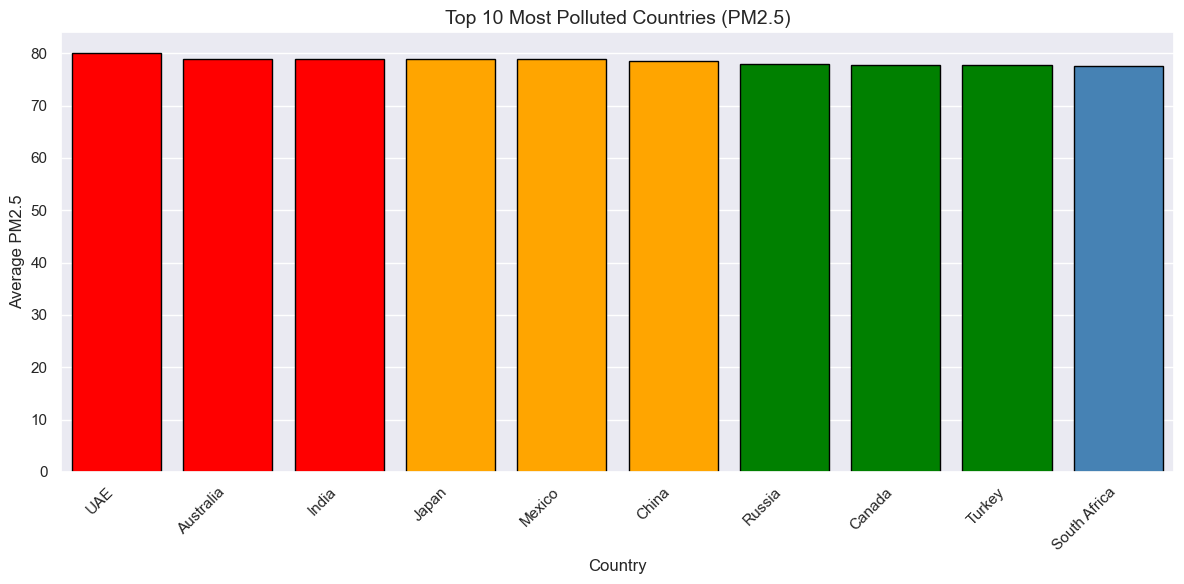

In [21]:
# top 10 countries by PM2.5
top10 = avg_pollutants["PM2.5"].head(10)
countries = top10.index.tolist()
values = top10.values

# custom colors (groups of 3)
colors = [
    "red", "red", "red",                        # UAE, Australia and India
    "orange", "orange", "orange",               # Japan, Mexico and China
    "green", "green", "green",                  # Russia, Canada and Turkey
    "steelblue"                                 # South Africa
]

# use seaborn to plot figure
plt.figure(figsize=(12,6))

sns.barplot(
    x=countries,
    y=values,
    color=None,        
    edgecolor="black"
)

# Apply custom colors manually bar-by-bar
bars = plt.gca().patches
for bar, col in zip(bars, colors):
    bar.set_facecolor(col)

plt.title("Top 10 Most Polluted Countries (PM2.5)", fontsize=14)
plt.ylabel("Average PM2.5")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

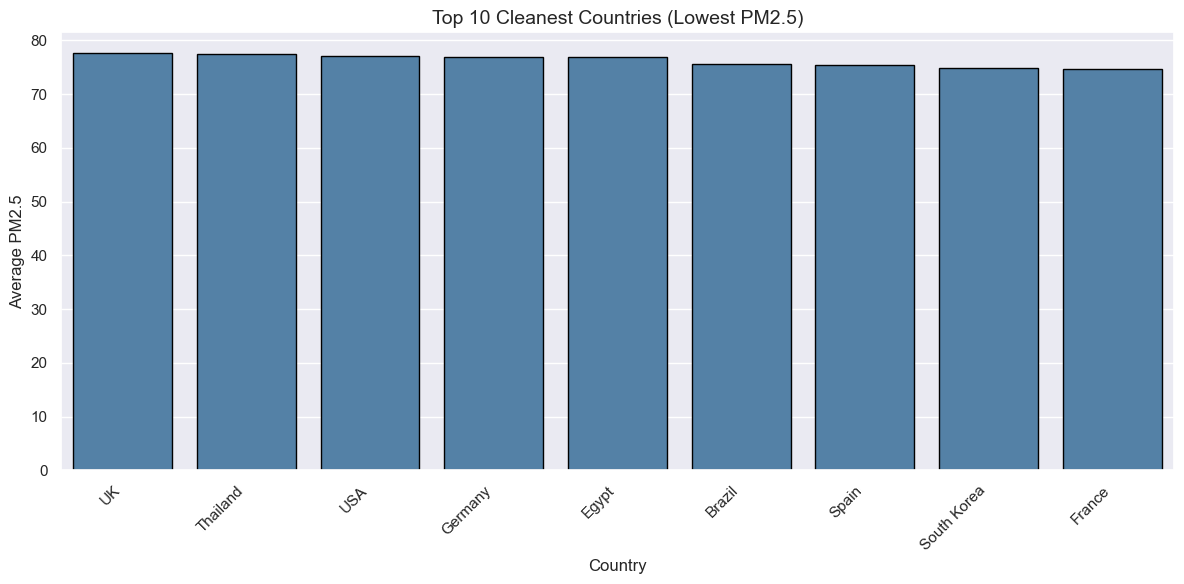

In [22]:
# bottom 10 countries by PM2.5
bottom10 = avg_pollutants["PM2.5"].tail(9)
countries = bottom10.index.tolist()
values = bottom10.values

# plot
plt.figure(figsize=(12,6))

sns.barplot(
    x=countries,
    y=values,
    color="steelblue",
    edgecolor="black"
)


plt.title("Top 10 Cleanest Countries (Lowest PM2.5)", fontsize=14)
plt.ylabel("Average PM2.5")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.3.3 Group Comparisons Summary

The highest average national PM2.5 levels in the world are in the UAE, Australia, India, Japan, Mexico, China, Russia, Canada, Turkey, and South Africa. In all cases, they are 78-80 µg/m³, far above the WHO/EPA safe level of ≈15 µg/m³, which may indicate consistent poor air quality and therefore continued exposure.

The 10 least polluted countries, (UK, Thailand, USA, Germany, Egypt, Brazil, Spain, South Korea, France), all have PM2.5 pollution in the 74-77 µg/m3 range, which is somewhat lower than the worst, but still greatly higher than WHO guidelines.

However, countries construed to be the cleanest and the most polluted only differ by a small 3-5 µg/m3 in PM2.5 exposure level, and no country had a PM2.5 exposure level in the healthy range in this dataset.

## 5.4 Multivariate Analysis (Linear Regression)



In [23]:
# Import OLS library
import statsmodels.api as sm

# Target variable
y = air_quality["PM2.5"]

# Predictor variables (pollutants + weather)
X = air_quality[
    [
        "PM10",
        "NO2",
        "SO2",
        "CO",
        "O3",
        "Temperature",
        "Humidity",
        "Wind Speed"
    ]
]

# Add intercept term to the model
X_const = sm.add_constant(X)

# Preview the data
X_const.head()

const    PM10    NO2    SO2    CO      O3  Temperature  Humidity  \
0    1.0   25.19  99.88  30.63  4.46   36.29        17.67     59.35   
1    1.0   97.39  48.14   8.71  3.40  144.16         3.46     67.51   
2    1.0   57.22  98.51   9.92  0.12  179.31        25.29     29.30   
3    1.0  130.52  10.96  33.03  7.74   38.65        23.15     99.97   
4    1.0   36.62  76.85  21.85  2.00   67.09        16.02     90.28   

   Wind Speed  
0       13.76  
1        6.36  
2       12.87  
3        7.71  
4       14.16

In [24]:
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6862
Date:                Fri, 28 Nov 2025   Prob (F-statistic):              0.704
Time:                        20:22:08   Log-Likelihood:                -51546.
No. Observations:               10000   AIC:                         1.031e+05
Df Residuals:                    9991   BIC:                         1.032e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          76.8485      2.167     35.459      

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif["feature"] = X_const.columns
vif

VIF      feature
0  26.711392        const
1   1.000355         PM10
2   1.000581          NO2
3   1.000335          SO2
4   1.000699           CO
5   1.000517           O3
6   1.000337  Temperature
7   1.000343     Humidity
8   1.000410   Wind Speed

In [26]:
# Prepare target and predictors
y = air_quality["PM2.5"]

X = air_quality[[
    "PM10", "NO2", "SO2", "CO", "O3",
    "Temperature", "Humidity", "Wind Speed"
]]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
from sklearn.linear_model import LinearRegression

# Initialize the model
lin_reg = LinearRegression()

# Fit on training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Metrics
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² score: -0.0012
Mean Absolute Error (MAE): 36.07
Root Mean Squared Error (RMSE): 41.89


In [31]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df

Feature  Coefficient
3           CO     0.039003
0         PM10     0.012366
1          NO2     0.011195
4           O3     0.006816
6     Humidity    -0.016815
5  Temperature    -0.023010
7   Wind Speed    -0.025348
2          SO2    -0.040614